In [8]:
import numpy as pd
import pandas as pd

In [9]:
data = pd.read_csv("spam.csv", encoding='latin-1')

In [10]:
import sys
print(sys.executable)

c:\Users\HP\anaconda3\python.exe


In [11]:
data.shape

(5572, 5)

#### Process Involved
1. Data Preprocessing
2. data cleaning
3. EDA
4. Text processing
5. Model building 
6. Evalution 
7. Hypertunning
8. Web convertion
9. Deploy

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.rename({"v1":"Target","v2":"Text"}, axis=1, inplace=True)

In [15]:
# Encoding the categorical values
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

data['Target'] = encode.fit_transform(data['Target'])
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
print(data.isnull().sum())
print("Duplicate Value: " + str(data.duplicated().sum()))

Target    0
Text      0
dtype: int64
Duplicate Value: 403


In [17]:
#  Remove the duplicate value
data.drop_duplicates(inplace=True)

### EDA


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


([<matplotlib.patches.Wedge at 0x1bf240a0ec0>,
 [Text(-1.0144997251399075, 0.4251944351600247, '0'),
  Text(1.014499764949479, -0.4251943401757036, '1')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

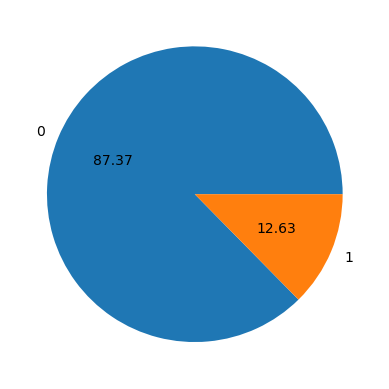

In [19]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(),autopct="%0.2f",labels=data["Target"].unique())

`Observation: little imbalance in our data`

### Text preprocessing

In [20]:
import nltk
nltk.download("punkit")  

[nltk_data] Error loading punkit: Package 'punkit' not found in index


False

In [21]:
data['total character'] = data.Text.apply(len)
data

,Target,Text,total character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
# Total no.of words
data['total words'] = data.Text.apply(lambda x:len(nltk.word_tokenize(x)))
data

,Target,Text,total character,total words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [23]:
# No of sentence
data["total sentence"] = data.Text.apply(lambda x:len(nltk.sent_tokenize(x)))
data

,Target,Text,total character,total words,total sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
data[data["Target"]==0].describe()

,Target,total character,total words,total sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [25]:
data[data["Target"]==1].describe()

,Target,total character,total words,total sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='total character', ylabel='Count'>

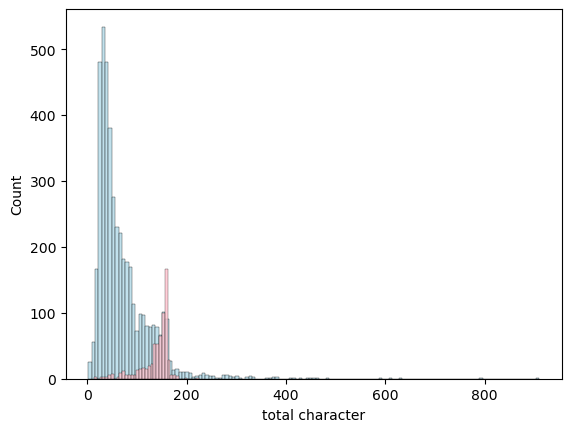

In [26]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total character']
filtered_data2 = data.loc[data['Target'] == 0, 'total character']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total words', ylabel='Count'>

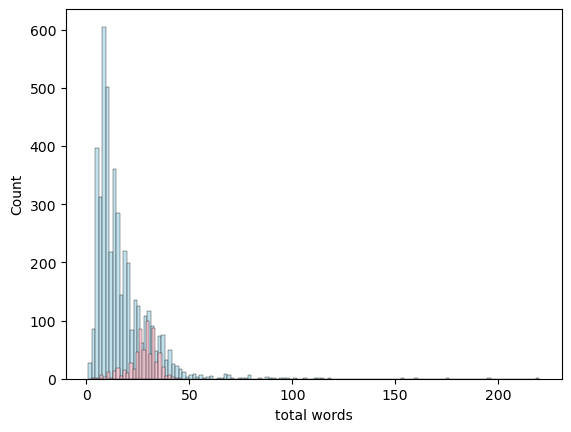

In [27]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total words']
filtered_data2 = data.loc[data['Target'] == 0, 'total words']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total sentence', ylabel='Count'>

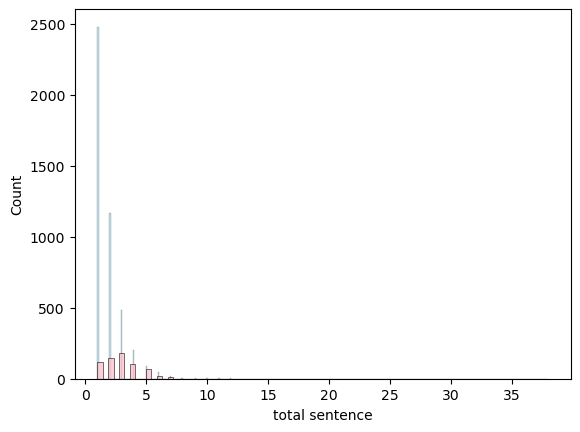

In [28]:
# Total no. of sent
filtered_data1= data.loc[data['Target'] == 1, 'total sentence']
filtered_data2 = data.loc[data['Target'] == 0, 'total sentence']

import seaborn as sns 
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")


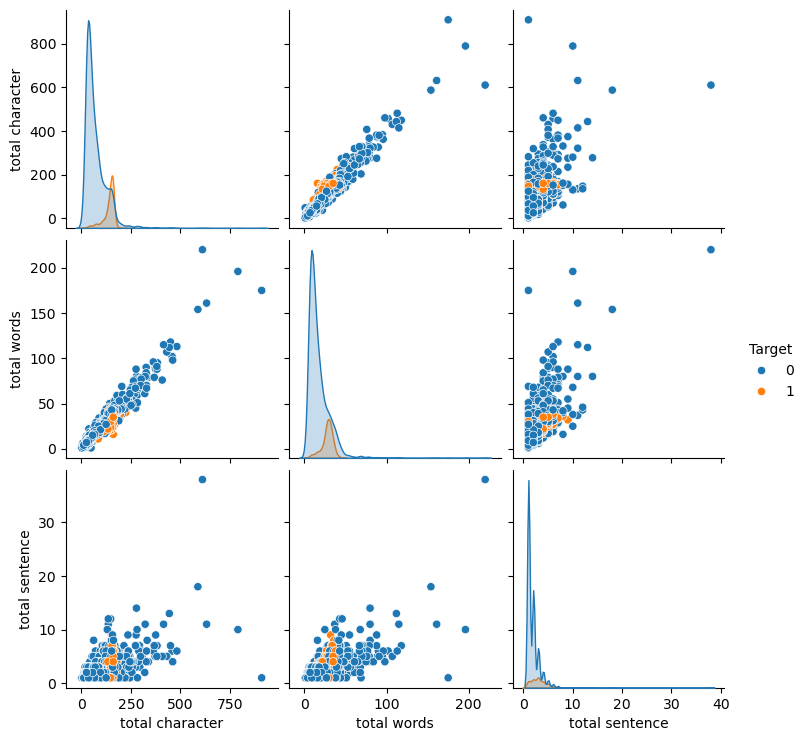

In [29]:
sns.pairplot(data,hue="Target")

There is linearity in my data 

<Axes: >

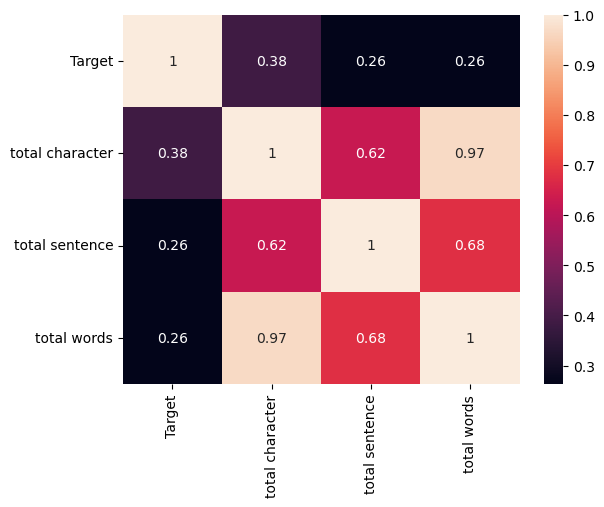

In [30]:
matrix =data[["Target", "total character" , "total sentence", "total words"]].corr()
sns.heatmap(matrix,annot=True)

`obsertion`: As I can see there is Multi-colinearity in data so, i will keep only one feature values --> that one would be `total charater` becouse it has high corelation with target values

### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem("loving") 

In [81]:
def process_text(text):

    text = text.lower()
    y = nltk.word_tokenize(text)

    text = y[:]
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    

    text = y[:]
    y = []
    for i in text:
         i=ps.stem(i)
         y.append(i)

    
    return ' '.join(y)

In [82]:
data["transformed_text"] = data.Text.apply(process_text)

In [83]:
data

,Target,Text,total character,total words,total sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


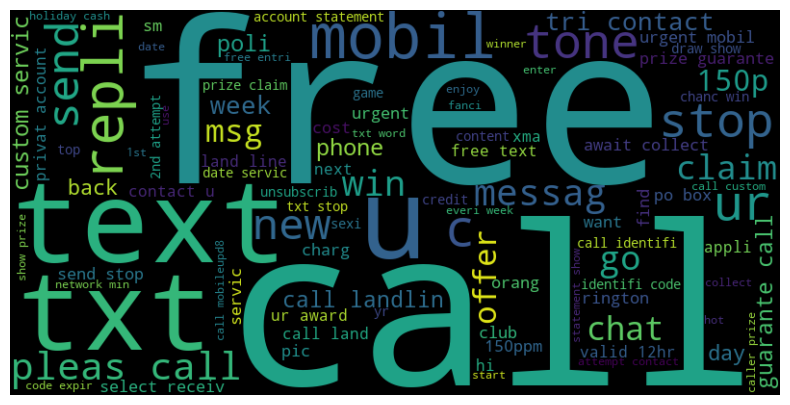

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the WordCloud dimensions are reasonable
wc = WordCloud(width=800, height=400, min_font_size=10, background_color="black")

# Filter and concatenate texts
filtered_texts = data.loc[data["Target"] == 1, "transformed_text"]
concatenated_text = ' '.join([text if isinstance(text, str) else ' '.join(text) for text in filtered_texts])

# Generate the word cloud
spam_wc = wc.generate(concatenated_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


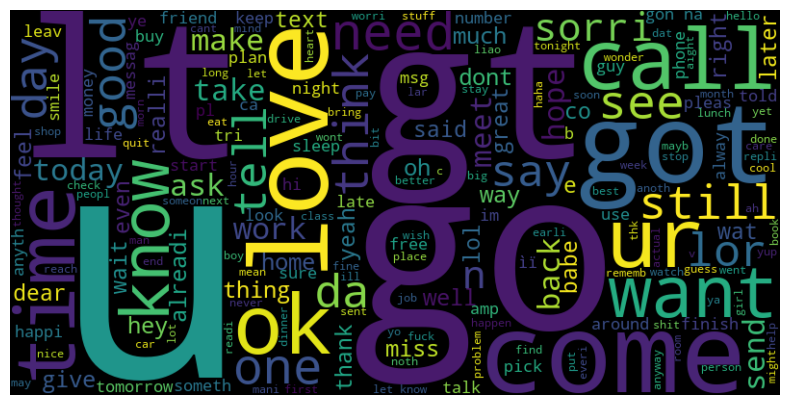

In [85]:
data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the WordCloud dimensions are reasonable
wc = WordCloud(width=800, height=400, min_font_size=10, background_color="black")

# Filter and concatenate texts
filtered_texts = data.loc[data["Target"] == 0, "transformed_text"]
concatenated_text = ' '.join([text if isinstance(text, str) else ' '.join(text) for text in filtered_texts])

# Generate the word cloud
spam_wc = wc.generate(concatenated_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [86]:
data

,Target,Text,total character,total words,total sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [101]:
spam_corpus=[]
for vec in (data[data["Target"] ==1]["transformed_text"]).tolist():
    for word in vec.split(sep=" "):
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [100]:
from collections import Counter   # ---> returns a dict with no. of frequency
cnt = Counter(spam_corpus).most_common(30)